In [80]:
import pandas as pd
import datetime
from pathlib import Path

Short visualization of lane AMS-FRA-JNB_LH_DtD

In [81]:
OpenWeatherMap = pd.read_csv(Path('Materials/OpenWeatherMap/283bc5149218e9c8104cbc4d2369cd43.csv'))
OpenWeatherMap = OpenWeatherMap.drop(columns=['lat','lon','weather_icon'])
OpenWeatherMap['temp'] = OpenWeatherMap['temp'].sub(272,15)
OpenWeatherMap['temp_min'] = OpenWeatherMap['temp_min'].sub(272,15)
OpenWeatherMap['temp_max'] = OpenWeatherMap['temp_max'].sub(272,15)
OpenWeatherMap['feels_like'] = OpenWeatherMap['feels_like'].sub(272,15)

In [82]:
time0 = OpenWeatherMap[OpenWeatherMap.dt_iso.str.contains("01-01 12:00:00")]
time0.temp.sub(272.15);

In [83]:
OpenWeatherMap.dt = OpenWeatherMap.dt.astype('datetime64[s]')

Text(0.5, 1.0, '1975')

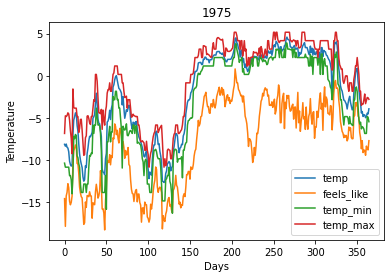

In [84]:
plt = OpenWeatherMap[0:365][['temp','feels_like','temp_min','temp_max']].plot()
plt.set_xlabel('Days')
plt.set_ylabel('Temperature')
plt.set_title('1975')

In [87]:
OpenWeatherMap = OpenWeatherMap.set_index('dt')

In [88]:
monthly = OpenWeatherMap.resample("M").mean()
yearly = OpenWeatherMap.resample("Y").mean()

Text(0.5, 0, 'Year')

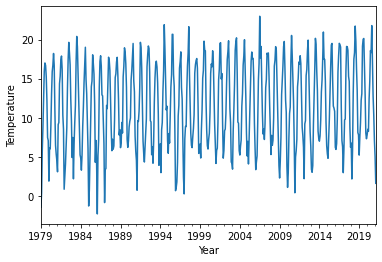

In [89]:
plt = monthly['temp'].plot()
plt.set_ylabel('Temperature')
plt.set_xlabel('Year')

<AxesSubplot:>

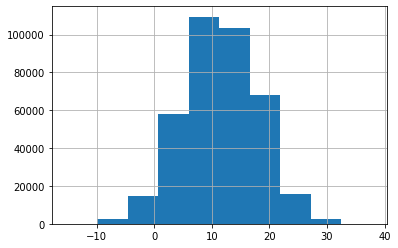

In [101]:
OpenWeatherMap['temp'].hist()

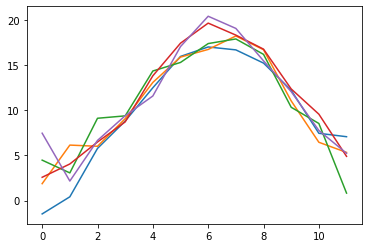

In [100]:
for i in range(0,60,12):
    temp = monthly[i:i+12]['temp']
    temp.index=range(0,12)
    temp.plot()